In [402]:
import os
import glob
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt


from obspy import read
from obspy.core import UTCDateTime as UT

plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 16

The catalogs were retrieved from the NEIC PDE database, available at ftp://hazards.cr.usgs.gov/NEICPDE/quakeml/.
These catalogs were turned into csv files that contain the phase for
information for a given earthquake at a given station.

In [223]:
df = pd.read_csv('quakeml/201330_cat_quakeml.csv')
df = df.fillna('NaN')                       # small detail
df = df[(df['Pg']!='NaN')&(df['Sg']!='NaN')]
df

,Unnamed: 0,network,station,channel,P,Pg,Pn,S,Sg,Sn,...,origin_latitude,origin_latitude_uncertainty,origin_longitude,origin_longitude_uncertainty,depth,depth_uncertainty,origin_ID,distance,azimuth,takeoff_angle
28,28,AK,EYAK,BH,NaN,2013-07-23T01:13:09.520000Z,NaN,NaN,2013-07-23T01:13:17.250000Z,NaN,...,60.7970,0.0333,-146.8330,0.0162,16700.0,5900.0,20130723011259_60_-146,0.588497,114.57600,78.3
158,158,IU,SNZO,BH,NaN,2013-07-23T02:03:17.510000Z,NaN,NaN,2013-07-23T02:03:22.760000Z,NaN,...,-41.6449,0.0360,174.2226,0.0269,7990.0,6000.0,wel_locationdisp_20130818230334_-42_174,0.493819,47.29720,81.6
159,159,NZ,NNZ,HH,NaN,2013-07-23T02:03:21.620000Z,NaN,NaN,2013-07-23T02:03:31.580000Z,NaN,...,-41.6449,0.0360,174.2226,0.0269,7990.0,6000.0,wel_locationdisp_20130818230334_-42_174,0.763764,303.59800,84.4
1360,1360,CI,OSI,BH,NaN,2013-07-23T12:40:14.720000Z,NaN,NaN,2013-07-23T12:40:23.980000Z,NaN,...,33.9223,0.0306,-118.4717,0.0254,11800.0,6400.0,11338562,0.721288,343.26600,81.6
4179,4179,IU,SNZO,BH,NaN,2013-07-25T01:59:06.240000Z,NaN,NaN,2013-07-25T01:59:13.460000Z,NaN,...,-41.7391,0.0531,174.1561,0.0396,5120.0,6700.0,wel_locationdisp_20130820035237_-42_174,0.595296,43.92920,85.7
4504,4504,CN,MNTQ,BH,NaN,2013-07-25T07:43:04.850000Z,NaN,NaN,2013-07-25T07:43:11.680000Z,NaN,...,45.9520,0.0198,-73.8000,0.0138,18000.0,1900.0,ott_createeventdisp_20130905113231_46_-74,0.468507,164.57300,71.1
4506,4506,CN,TRQ,EH,NaN,2013-07-25T07:43:07.280000Z,NaN,NaN,2013-07-25T07:43:15.230000Z,NaN,...,45.9520,0.0198,-73.8000,0.0138,18000.0,1900.0,ott_createeventdisp_20130905113231_46_-74,0.586535,297.19100,77.7
4514,4514,GS,ADOK,HN,NaN,2013-07-25T08:52:13.480000Z,NaN,NaN,2013-07-25T08:52:19.890000Z,NaN,...,36.1000,0.0441,-97.0520,0.0356,5500.0,3500.0,tul_createeventdisp_20130726065512_36_-97,0.516733,210.19500,84.2
4517,4517,TA,TUL1,BH,NaN,2013-07-25T08:52:22.860000Z,NaN,NaN,2013-07-25T08:52:36.620000Z,NaN,...,36.1000,0.0441,-97.0520,0.0356,5500.0,3500.0,tul_createeventdisp_20130726065512_36_-97,1.039100,100.12000,50.2
4532,4532,NZ,NNZ,HH,NaN,2013-07-25T09:48:23.170000Z,NaN,NaN,2013-07-25T09:48:33.710000Z,NaN,...,-41.6798,0.0171,174.2614,0.0128,14430.0,5500.0,wel_locationdisp_20130905115544_-42_174,0.807378,304.49200,81.2


In [224]:
df.columns

Index(['Unnamed: 0', 'network', 'station', 'channel', 'P', 'Pg', 'Pn', 'S',
       'Sg', 'Sn', 'P_weight', 'Pg_weight', 'Pn_weight', 'S_weight',
       'Sg_weight', 'Sn_weight', 'P_evaluation_mode', 'Pg_evaluation_mode',
       'Pn_evaluation_mode', 'S_evaluation_mode', 'Sg_evaluation_mode',
       'Sn_evaluation_mode', 'origin_time', 'origin_time_uncertainty',
       'origin_latitude', 'origin_latitude_uncertainty', 'origin_longitude',
       'origin_longitude_uncertainty', 'depth', 'depth_uncertainty',
       'origin_ID', 'distance', 'azimuth', 'takeoff_angle'],
      dtype='object')

Later, the download of the waveforms for each of those traces is attempted via Obspy, by querying all of the servers and networks available.
The names of the waveforms is like follows.


In [225]:
def pair_data_waveforms(df,phase):
    pairs = []
    df['wavenames'] = df['network']+'.'+df['station']+'.'+df[phase]+'.'+phase+'.mseed'
    for i,row in df.iterrows():
        try:
            st = read('mseedfiles/'+row['wavenames'])
            #print(st)
            pair = [row,st]
            pairs.append(pair)
        except Exception as e:
            'No waveforms found'
            
    return pairs

In [226]:
pgpairs = pair_data_waveforms(df,'Pg')

In [227]:
pgpairs[0]

[Unnamed: 0                                                                28
 network                                                                   AK
 station                                                                 EYAK
 channel                                                                   BH
 P                                                                        NaN
 Pg                                               2013-07-23T01:13:09.520000Z
 Pn                                                                       NaN
 S                                                                        NaN
 Sg                                               2013-07-23T01:13:17.250000Z
 Sn                                                                       NaN
 P_weight                                                                 NaN
 Pg_weight                                                                  0
 Pn_weight                                                      

In [260]:
def plot_phases(pair):
    metadata = pair[0]; st = pair[1]
    plt.figure(figsize=(16,4))
    # find the position of the arrivals
    
    for i,tr in enumerate(st.normalize().detrend('linear')):
        plt.plot(tr.data-2*i,'k',linewidth=0.5)
        plt.text(len(tr.data), -2*i,tr.stats.channel)
        
        if metadata.Pg != 'NaN':
            pg_pos = (UT(metadata.Pg) - tr.stats.starttime)*tr.stats.sampling_rate
            plt.scatter(pg_pos,-2*i,s=4000,c='r',marker='|',label='Pg')
            if i==0:plt.text(pg_pos,-2*i+1,'Pg',c='r')
        if metadata.Pn != 'NaN':
            pn_pos = (UT(metadata.Pn) - tr.stats.starttime)*tr.stats.sampling_rate
            plt.scatter(pn_pos,-2*i,s=4000,c='r',marker='|',label='Pn') 
            if i==0:plt.text(pn_pos,-2*i+1,'Pn',c='r')
        if metadata.Sg != 'NaN':
            sg_pos = (UT(metadata.Sg) - tr.stats.starttime)*tr.stats.sampling_rate
            plt.scatter(sg_pos,-2*i,s=4000,c='b',marker='|',label='Sg')
            if i==0:plt.text(sg_pos,-2*i+1,'Sg',c='b')
        if metadata.Sn != 'NaN':
            sn_pos = (UT(metadata.Sn) - tr.stats.starttime)*tr.stats.sampling_rate
            plt.scatter(sn_pos,-2*i,s=4000,c='b',marker='|',label='Sn')
            if i==0:plt.text(sn_pos,-2*i+1,'Sn',c='b')

    plt.ylim(-len(st)-2.5,2)
    plt.yticks([])
    plt.title(tr.id[:-3])
    #plt.legend()
    

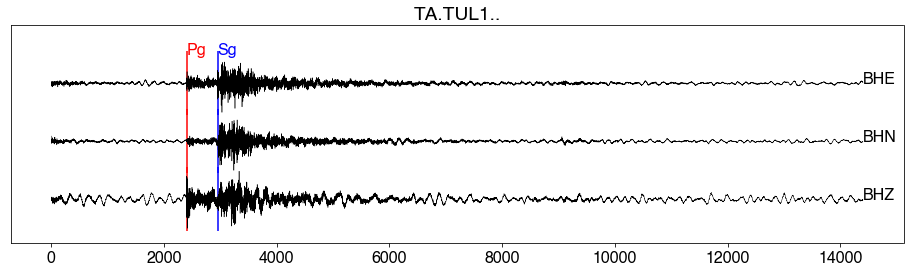

In [256]:
plot_phases(pgpairs[6])

In [258]:
df = pd.read_csv('quakeml/201330_cat_quakeml.csv')
df = df.fillna('NaN')                       # small detail
df = df[(df['Pn']!='NaN')&(df['Sn']!='NaN')]
pnpairs = pair_data_waveforms(df,'Pn')

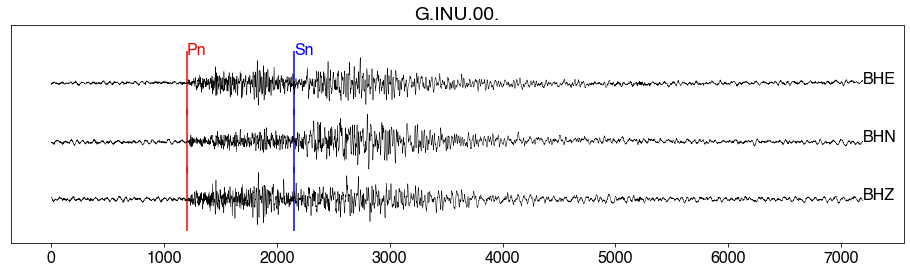

In [264]:
plot_phases(pnpairs[9])

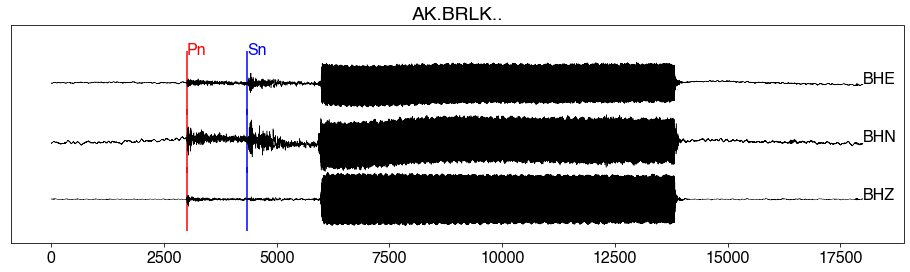

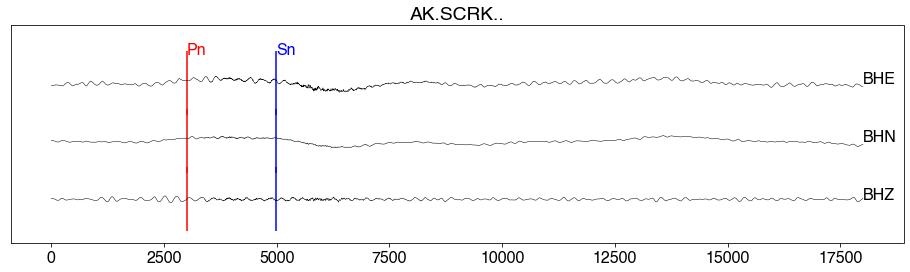

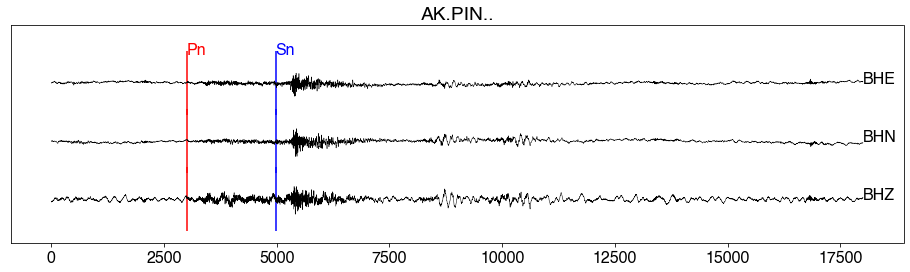

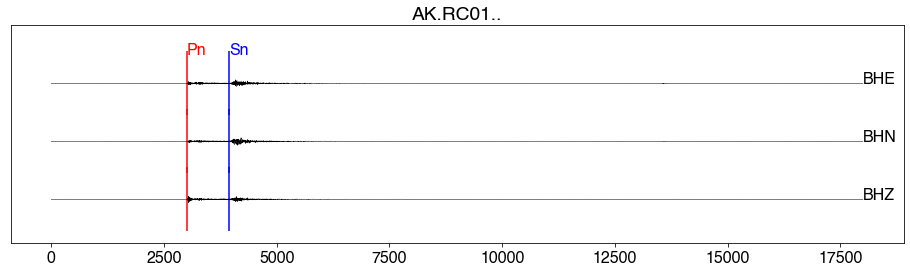

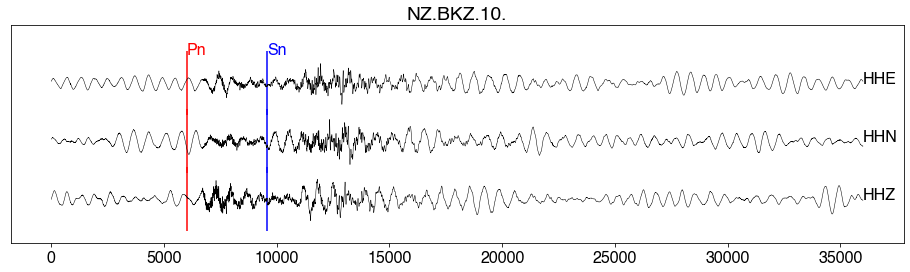

In [265]:
for i in range(5):
    plot_phases(pnpairs[i])

In [431]:
# create the x and y
def create_input(pair,resample=True,filter=True,samples=5*6000):
    metadata = pair[0]; st = pair[1]
    sampling_rates = list(set([tr.stats.sampling_rate for tr in st]))
    keep_sampling_rate = max(sampling_rates)
    print(sampling_rates,' keep ',keep_sampling_rate)
    st = st.select(sampling_rate=keep_sampling_rate)
    if keep_sampling_rate!=100.:
        st.resample(100)
    # process 
    st.detrend('linear')
    st.filter('bandpass',freqmin=0.1,freqmax=45)
    st.detrend('linear')
    st.normalize()
    
    # trim to exact length
    for tr in st:
        tr.trim(endtime=tr.stats.starttime+(5*60)-0.01)
    
    print(st)
    data = np.zeros((3,samples))
    # missing channels are filled with zeros anyways
    if len(st.select(component='E'))>0:
        data[0,:] = st.select(component='E')[0].data
    if len(st.select(component='1'))>0:
        data[0,:] = st.select(component='1')[0].data
    if len(st.select(component='N'))>0:
        data[1,:] = st.select(component='N')[0].data
    if len(st.select(component='2'))>0:
        data[1,:] = st.select(component='2')[0].data  
        
    try: data[2,:] = st.select(component='Z')[0].data
    except Exception as e: print('No Z channel')
    print(st)
    print(data)
    
    #x = tf.convert_to_tensor(data)
    
    # Create the label y
    reftime = st[0].stats.starttime
    pg_pos=None;pn_pos=None;sg_pos=None;sn_pos=None
    y_dic = {'Pg':0,'Pn':0,'Sg':0,'Sn':0,'data':data}
    
    if metadata.Pg != 'NaN':
        y_dic['Pg'] = (UT(metadata.Pg) - tr.stats.starttime)*tr.stats.sampling_rate
        
    if metadata.Pn != 'NaN':
        y_dic['Pn'] = (UT(metadata.Pn) - tr.stats.starttime)*tr.stats.sampling_rate

    if metadata.Sg != 'NaN':
        y_dic['Sg'] = (UT(metadata.Sg) - tr.stats.starttime)*tr.stats.sampling_rate

    if metadata.Sn != 'NaN':
        y_dic['Sn'] = (UT(metadata.Sn) - tr.stats.starttime)*tr.stats.sampling_rate

    y = [pg_pos,pn_pos,sg_pos,sn_pos]
    
    return y_dic

In [426]:
def write_input(inputdata,name):
    tempfile=open(name,'wb')
    pickle.dump(inputdata,tempfile)
    tempfile.close()

In [429]:
a_file = open('example.pkl','rb')
data = pickle.load(a_file)
print(data)

{'Pg': 0, 'Pn': 5999.16, 'Sg': 0, 'Sn': 9969.16, 'data': array([[ -1.99669119e-03,  -3.97587509e-03,  -2.88449768e-02, ...,
         -2.54862092e-01,  -2.44881112e-01,  -2.37025206e-01],
       [  3.95880566e-04,  -1.01601418e-03,  -5.59430399e-03, ...,
          1.49109905e-01,   1.53176432e-01,   1.57157232e-01],
       [ -1.52024847e-03,  -3.52649153e-04,   8.86848831e-03, ...,
          4.46688008e-01,   4.48445103e-01,   4.48579393e-01]])}


In [432]:
for i in range(len(pnpairs)):
    data = create_input(pnpairs[i])
    write_input(data,'data_'+str(i)+'.pkl')

[100.0]  keep  100.0
3 Trace(s) in Stream:
AK.BRLK..BHE | 2013-07-23T01:12:34.128400Z - 2013-07-23T01:17:34.118400Z | 100.0 Hz, 30000 samples
AK.BRLK..BHN | 2013-07-23T01:12:34.128400Z - 2013-07-23T01:17:34.118400Z | 100.0 Hz, 30000 samples
AK.BRLK..BHZ | 2013-07-23T01:12:34.128400Z - 2013-07-23T01:17:34.118400Z | 100.0 Hz, 30000 samples
3 Trace(s) in Stream:
AK.BRLK..BHE | 2013-07-23T01:12:34.128400Z - 2013-07-23T01:17:34.118400Z | 100.0 Hz, 30000 samples
AK.BRLK..BHN | 2013-07-23T01:12:34.128400Z - 2013-07-23T01:17:34.118400Z | 100.0 Hz, 30000 samples
AK.BRLK..BHZ | 2013-07-23T01:12:34.128400Z - 2013-07-23T01:17:34.118400Z | 100.0 Hz, 30000 samples
[[-0.00016382  0.00024061  0.00178574 ...,  0.00044664 -0.00929262
  -0.01754986]
 [-0.00064313 -0.00236463 -0.01098266 ...,  0.12550868  0.12681279
   0.12406447]
 [ 0.00029324  0.00115243  0.00621765 ..., -0.01778993 -0.01929216
  -0.02249617]]
[100.0]  keep  100.0
3 Trace(s) in Stream:
AK.SCRK..BHE | 2013-07-23T01:12:51.528400Z - 2013-0

3 Trace(s) in Stream:
G.INU.00.BHE | 2013-07-23T02:03:50.261303Z - 2013-07-23T02:08:50.251303Z | 100.0 Hz, 30000 samples
G.INU.00.BHN | 2013-07-23T02:03:50.261304Z - 2013-07-23T02:08:50.251304Z | 100.0 Hz, 30000 samples
G.INU.00.BHZ | 2013-07-23T02:03:50.261304Z - 2013-07-23T02:08:50.251304Z | 100.0 Hz, 30000 samples
3 Trace(s) in Stream:
G.INU.00.BHE | 2013-07-23T02:03:50.261303Z - 2013-07-23T02:08:50.251303Z | 100.0 Hz, 30000 samples
G.INU.00.BHN | 2013-07-23T02:03:50.261304Z - 2013-07-23T02:08:50.251304Z | 100.0 Hz, 30000 samples
G.INU.00.BHZ | 2013-07-23T02:03:50.261304Z - 2013-07-23T02:08:50.251304Z | 100.0 Hz, 30000 samples
[[ -3.63365749e-04  -1.37273179e-03  -5.30216839e-03 ...,   5.07732965e-02
    5.02592341e-02   4.92438877e-02]
 [  4.10375570e-05  -1.21908052e-03  -6.18749276e-03 ...,  -3.91167321e-03
   -3.30595643e-03  -2.83665969e-03]
 [  2.87955634e-04   1.95817507e-03   1.02988972e-02 ...,   4.66567440e-02
    4.58552664e-02   4.49041438e-02]]
[100.0, 20.0]  keep  100.

3 Trace(s) in Stream:
IU.AFI.10.BH1 | 2013-07-23T10:32:26.869536Z - 2013-07-23T10:37:26.859536Z | 100.0 Hz, 30000 samples
IU.AFI.10.BH2 | 2013-07-23T10:32:26.869536Z - 2013-07-23T10:37:26.859536Z | 100.0 Hz, 30000 samples
IU.AFI.10.BHZ | 2013-07-23T10:32:26.869538Z - 2013-07-23T10:37:26.859538Z | 100.0 Hz, 30000 samples
3 Trace(s) in Stream:
IU.AFI.10.BH1 | 2013-07-23T10:32:26.869536Z - 2013-07-23T10:37:26.859536Z | 100.0 Hz, 30000 samples
IU.AFI.10.BH2 | 2013-07-23T10:32:26.869536Z - 2013-07-23T10:37:26.859536Z | 100.0 Hz, 30000 samples
IU.AFI.10.BHZ | 2013-07-23T10:32:26.869538Z - 2013-07-23T10:37:26.859538Z | 100.0 Hz, 30000 samples
[[-0.00273736 -0.02622216 -0.09318646 ...,  0.05258441  0.05149393
   0.05057971]
 [ 0.00257515  0.02575988  0.09672772 ...,  0.07670031  0.07828462
   0.07979154]
 [ 0.00081878  0.00601603  0.02297648 ..., -0.02123455 -0.02229818
  -0.02317746]]
[100.0]  keep  100.0
3 Trace(s) in Stream:
AK.HOM..BHE | 2013-07-23T10:36:41.508400Z - 2013-07-23T10:41:41.49

3 Trace(s) in Stream:
CI.ISA..BHE | 2013-07-23T12:39:31.219500Z - 2013-07-23T12:44:31.209500Z | 100.0 Hz, 30000 samples
CI.ISA..BHN | 2013-07-23T12:39:31.219500Z - 2013-07-23T12:44:31.209500Z | 100.0 Hz, 30000 samples
CI.ISA..BHZ | 2013-07-23T12:39:31.219500Z - 2013-07-23T12:44:31.209500Z | 100.0 Hz, 30000 samples
3 Trace(s) in Stream:
CI.ISA..BHE | 2013-07-23T12:39:31.219500Z - 2013-07-23T12:44:31.209500Z | 100.0 Hz, 30000 samples
CI.ISA..BHN | 2013-07-23T12:39:31.219500Z - 2013-07-23T12:44:31.209500Z | 100.0 Hz, 30000 samples
CI.ISA..BHZ | 2013-07-23T12:39:31.219500Z - 2013-07-23T12:44:31.209500Z | 100.0 Hz, 30000 samples
[[-0.00076837 -0.01471844 -0.05735644 ...,  0.31788086  0.3145093
   0.3130644 ]
 [-0.0027165  -0.03916303 -0.14443676 ..., -0.29900866 -0.29697747
  -0.29471411]
 [ 0.00288268  0.01565754  0.04907722 ..., -0.47058945 -0.47663692
  -0.47848865]]
[100.0, 20.0]  keep  100.0
3 Trace(s) in Stream:
IU.LSZ.10.BH1 | 2013-07-23T17:11:21.519538Z - 2013-07-23T17:16:21.509538Z

6 Trace(s) in Stream:
IU.RAO.00.BH1 | 2013-07-24T03:32:56.644538Z - 2013-07-24T03:37:56.634538Z | 100.0 Hz, 30000 samples
IU.RAO.00.BH2 | 2013-07-24T03:32:56.644539Z - 2013-07-24T03:37:56.634539Z | 100.0 Hz, 30000 samples
IU.RAO.00.BHZ | 2013-07-24T03:32:56.644539Z - 2013-07-24T03:37:56.634539Z | 100.0 Hz, 30000 samples
IU.RAO.10.BH1 | 2013-07-24T03:32:56.644538Z - 2013-07-24T03:37:56.634538Z | 100.0 Hz, 30000 samples
IU.RAO.10.BH2 | 2013-07-24T03:32:56.644538Z - 2013-07-24T03:37:56.634538Z | 100.0 Hz, 30000 samples
IU.RAO.10.BHZ | 2013-07-24T03:32:56.644538Z - 2013-07-24T03:37:56.634538Z | 100.0 Hz, 30000 samples
6 Trace(s) in Stream:
IU.RAO.00.BH1 | 2013-07-24T03:32:56.644538Z - 2013-07-24T03:37:56.634538Z | 100.0 Hz, 30000 samples
IU.RAO.00.BH2 | 2013-07-24T03:32:56.644539Z - 2013-07-24T03:37:56.634539Z | 100.0 Hz, 30000 samples
IU.RAO.00.BHZ | 2013-07-24T03:32:56.644539Z - 2013-07-24T03:37:56.634539Z | 100.0 Hz, 30000 samples
IU.RAO.10.BH1 | 2013-07-24T03:32:56.644538Z - 2013-07-24

3 Trace(s) in Stream:
PR.MTP..BHE | 2013-07-24T21:43:17.750000Z - 2013-07-24T21:48:17.740000Z | 100.0 Hz, 30000 samples
PR.MTP..BHN | 2013-07-24T21:43:17.750000Z - 2013-07-24T21:48:17.740000Z | 100.0 Hz, 30000 samples
PR.MTP..BHZ | 2013-07-24T21:43:17.750000Z - 2013-07-24T21:48:17.740000Z | 100.0 Hz, 30000 samples
3 Trace(s) in Stream:
PR.MTP..BHE | 2013-07-24T21:43:17.750000Z - 2013-07-24T21:48:17.740000Z | 100.0 Hz, 30000 samples
PR.MTP..BHN | 2013-07-24T21:43:17.750000Z - 2013-07-24T21:48:17.740000Z | 100.0 Hz, 30000 samples
PR.MTP..BHZ | 2013-07-24T21:43:17.750000Z - 2013-07-24T21:48:17.740000Z | 100.0 Hz, 30000 samples
[[-0.0129027  -0.11328063 -0.40584857 ..., -0.09217348 -0.09472069
  -0.09700691]
 [-0.007258   -0.06175389 -0.20719922 ..., -0.06413528 -0.06098663
  -0.05999891]
 [ 0.00477765  0.03478729  0.11415924 ...,  0.16660645  0.16845999
   0.16924426]]
[100.0]  keep  100.0
3 Trace(s) in Stream:
IC.XAN.10.HH1 | 2013-07-25T01:39:03.588393Z - 2013-07-25T01:44:03.578393Z | 10

3 Trace(s) in Stream:
NC.KHMB..HHE | 2013-07-25T03:38:50.380000Z - 2013-07-25T03:43:50.370000Z | 100.0 Hz, 30000 samples
NC.KHMB..HHN | 2013-07-25T03:38:50.380000Z - 2013-07-25T03:43:50.370000Z | 100.0 Hz, 30000 samples
NC.KHMB..HHZ | 2013-07-25T03:38:50.380000Z - 2013-07-25T03:43:50.370000Z | 100.0 Hz, 30000 samples
3 Trace(s) in Stream:
NC.KHMB..HHE | 2013-07-25T03:38:50.380000Z - 2013-07-25T03:43:50.370000Z | 100.0 Hz, 30000 samples
NC.KHMB..HHN | 2013-07-25T03:38:50.380000Z - 2013-07-25T03:43:50.370000Z | 100.0 Hz, 30000 samples
NC.KHMB..HHZ | 2013-07-25T03:38:50.380000Z - 2013-07-25T03:43:50.370000Z | 100.0 Hz, 30000 samples
[[ 0.0008717  -0.00786907 -0.03210654 ..., -0.07459876 -0.12302589
  -0.14291732]
 [-0.00222161 -0.01918038 -0.07102071 ..., -0.09400829 -0.1284408
  -0.13941848]
 [-0.00124516 -0.02935099 -0.12042853 ..., -0.04351595 -0.08816793
  -0.1844301 ]]
[100.0]  keep  100.0
3 Trace(s) in Stream:
NC.KCPB..HHE | 2013-07-25T03:38:52.520000Z - 2013-07-25T03:43:52.510000Z 

3 Trace(s) in Stream:
CN.INK..BHE | 2013-07-25T07:17:42.400000Z - 2013-07-25T07:22:42.390000Z | 100.0 Hz, 30000 samples
CN.INK..BHN | 2013-07-25T07:17:42.400000Z - 2013-07-25T07:22:42.390000Z | 100.0 Hz, 30000 samples
CN.INK..BHZ | 2013-07-25T07:17:42.400000Z - 2013-07-25T07:22:42.390000Z | 100.0 Hz, 30000 samples
3 Trace(s) in Stream:
CN.INK..BHE | 2013-07-25T07:17:42.400000Z - 2013-07-25T07:22:42.390000Z | 100.0 Hz, 30000 samples
CN.INK..BHN | 2013-07-25T07:17:42.400000Z - 2013-07-25T07:22:42.390000Z | 100.0 Hz, 30000 samples
CN.INK..BHZ | 2013-07-25T07:17:42.400000Z - 2013-07-25T07:22:42.390000Z | 100.0 Hz, 30000 samples
[[-0.0019649  -0.02277972 -0.09797489 ..., -0.38517739 -0.39480076
  -0.40350647]
 [ 0.01325412  0.12141723  0.4474204  ..., -0.13147892 -0.12267397
  -0.11409958]
 [ 0.00439734  0.02576809  0.09132069 ..., -0.06478197 -0.06837531
  -0.07351499]]
[100.0]  keep  100.0
3 Trace(s) in Stream:
AK.PPD..BHE | 2013-07-25T07:18:38.508400Z - 2013-07-25T07:23:38.498400Z | 100.

3 Trace(s) in Stream:
AU.COEN..BHE | 2013-07-25T10:43:57.894500Z - 2013-07-25T10:48:57.884500Z | 100.0 Hz, 30000 samples
AU.COEN..BHN | 2013-07-25T10:43:57.894500Z - 2013-07-25T10:48:57.884500Z | 100.0 Hz, 30000 samples
AU.COEN..BHZ | 2013-07-25T10:43:57.894500Z - 2013-07-25T10:48:57.884500Z | 100.0 Hz, 30000 samples
3 Trace(s) in Stream:
AU.COEN..BHE | 2013-07-25T10:43:57.894500Z - 2013-07-25T10:48:57.884500Z | 100.0 Hz, 30000 samples
AU.COEN..BHN | 2013-07-25T10:43:57.894500Z - 2013-07-25T10:48:57.884500Z | 100.0 Hz, 30000 samples
AU.COEN..BHZ | 2013-07-25T10:43:57.894500Z - 2013-07-25T10:48:57.884500Z | 100.0 Hz, 30000 samples
[[ 0.00133151  0.02592817  0.09469691 ..., -0.42042392 -0.41323301
  -0.40553247]
 [ 0.01249848  0.11283559  0.43590511 ...,  0.19617885  0.1897631
   0.18329912]
 [-0.0090445  -0.07172896 -0.25970159 ...,  0.40027762  0.40238187
   0.40403496]]
[100.0]  keep  100.0
1 Trace(s) in Stream:
CN.MOQ..EHZ | 2013-07-25T12:31:22.770000Z - 2013-07-25T12:36:22.760000Z |

3 Trace(s) in Stream:
IU.LCO..BHE | 2013-07-26T09:50:42.385841Z - 2013-07-26T09:55:42.375841Z | 100.0 Hz, 30000 samples
IU.LCO..BHN | 2013-07-26T09:50:42.385841Z - 2013-07-26T09:55:42.375841Z | 100.0 Hz, 30000 samples
IU.LCO..BHZ | 2013-07-26T09:50:42.385841Z - 2013-07-26T09:55:42.375841Z | 100.0 Hz, 30000 samples
3 Trace(s) in Stream:
IU.LCO..BHE | 2013-07-26T09:50:42.385841Z - 2013-07-26T09:55:42.375841Z | 100.0 Hz, 30000 samples
IU.LCO..BHN | 2013-07-26T09:50:42.385841Z - 2013-07-26T09:55:42.375841Z | 100.0 Hz, 30000 samples
IU.LCO..BHZ | 2013-07-26T09:50:42.385841Z - 2013-07-26T09:55:42.375841Z | 100.0 Hz, 30000 samples
[[-0.02766234 -0.21896991 -0.66137403 ..., -0.30708857 -0.30329935
  -0.29939737]
 [-0.02455814 -0.20189326 -0.64950983 ..., -0.14609008 -0.14676988
  -0.14735919]
 [-0.0057323  -0.05883854 -0.20616144 ..., -0.1797884  -0.17421582
  -0.16808601]]
[100.0]  keep  100.0
3 Trace(s) in Stream:
C.GO03..BHE | 2013-07-26T09:51:02.875000Z - 2013-07-26T09:56:02.865000Z | 100.

[100.0]  keep  100.0
3 Trace(s) in Stream:
GE.FAKI..BHE | 2013-07-27T06:46:46.669538Z - 2013-07-27T06:51:46.659538Z | 100.0 Hz, 30000 samples
GE.FAKI..BHN | 2013-07-27T06:46:46.669538Z - 2013-07-27T06:51:46.659538Z | 100.0 Hz, 30000 samples
GE.FAKI..BHZ | 2013-07-27T06:46:46.669538Z - 2013-07-27T06:51:46.659538Z | 100.0 Hz, 30000 samples
3 Trace(s) in Stream:
GE.FAKI..BHE | 2013-07-27T06:46:46.669538Z - 2013-07-27T06:51:46.659538Z | 100.0 Hz, 30000 samples
GE.FAKI..BHN | 2013-07-27T06:46:46.669538Z - 2013-07-27T06:51:46.659538Z | 100.0 Hz, 30000 samples
GE.FAKI..BHZ | 2013-07-27T06:46:46.669538Z - 2013-07-27T06:51:46.659538Z | 100.0 Hz, 30000 samples
[[-0.00511268 -0.03925107 -0.12934274 ...,  0.09679391  0.09845931
   0.09986882]
 [-0.02406771 -0.19625189 -0.63568895 ...,  0.06081688  0.06048193
   0.06022593]
 [-0.00127461 -0.0092853  -0.03549892 ..., -0.09554164 -0.0972604
  -0.09899219]]
[100.0]  keep  100.0
3 Trace(s) in Stream:
G.PEL.00.BHE | 2013-07-27T10:33:33.750000Z - 2013-07

3 Trace(s) in Stream:
PR.MTP..BHE | 2013-07-28T08:31:59.275000Z - 2013-07-28T08:36:59.265000Z | 100.0 Hz, 30000 samples
PR.MTP..BHN | 2013-07-28T08:31:59.275000Z - 2013-07-28T08:36:59.265000Z | 100.0 Hz, 30000 samples
PR.MTP..BHZ | 2013-07-28T08:31:59.275000Z - 2013-07-28T08:36:59.265000Z | 100.0 Hz, 30000 samples
3 Trace(s) in Stream:
PR.MTP..BHE | 2013-07-28T08:31:59.275000Z - 2013-07-28T08:36:59.265000Z | 100.0 Hz, 30000 samples
PR.MTP..BHN | 2013-07-28T08:31:59.275000Z - 2013-07-28T08:36:59.265000Z | 100.0 Hz, 30000 samples
PR.MTP..BHZ | 2013-07-28T08:31:59.275000Z - 2013-07-28T08:36:59.265000Z | 100.0 Hz, 30000 samples
[[ 0.01460389  0.11820235  0.355143   ...,  0.04834189  0.05539961
   0.06263206]
 [ 0.0089831   0.0739917   0.24673584 ...,  0.15846582  0.15288681
   0.14646274]
 [-0.00581525 -0.04723383 -0.16130182 ...,  0.21321498  0.20830488
   0.20251273]]
[100.0]  keep  100.0
1 Trace(s) in Stream:
PR.PDPR..BHE | 2013-07-28T08:31:58.425000Z - 2013-07-28T08:36:58.415000Z | 100

2 Trace(s) in Stream:
II.PALK.10.BH2 | 2013-07-29T02:28:42.594500Z - 2013-07-29T02:33:42.584500Z | 100.0 Hz, 30000 samples
II.PALK.10.BHZ | 2013-07-29T02:28:42.594500Z - 2013-07-29T02:33:42.584500Z | 100.0 Hz, 30000 samples
2 Trace(s) in Stream:
II.PALK.10.BH2 | 2013-07-29T02:28:42.594500Z - 2013-07-29T02:33:42.584500Z | 100.0 Hz, 30000 samples
II.PALK.10.BHZ | 2013-07-29T02:28:42.594500Z - 2013-07-29T02:33:42.584500Z | 100.0 Hz, 30000 samples
[[ 0.          0.          0.         ...,  0.          0.
   0.        ]
 [ 0.0053195   0.04979185  0.1689909  ...,  0.38022749  0.3806397
   0.37968259]
 [-0.00309799 -0.02385286 -0.07306611 ..., -0.22434165 -0.22415203
  -0.22420903]]
[100.0]  keep  100.0
3 Trace(s) in Stream:
PR.STVI..BHE | 2013-07-29T05:19:06.595000Z - 2013-07-29T05:24:06.585000Z | 100.0 Hz, 30000 samples
PR.STVI..BHN | 2013-07-29T05:19:06.595000Z - 2013-07-29T05:24:06.585000Z | 100.0 Hz, 30000 samples
PR.STVI..BHZ | 2013-07-29T05:19:06.595000Z - 2013-07-29T05:24:06.585000Z 

In [277]:
print('Number of total events', events)

Number of total events 138419


#  138419 different earthquakes in database
#  4502640 total traces
## 1692 traces contain P and S picks
## 41590 traces contain both Pn and Sn  
## 72544 traces contain both Pg and Sg
## 4109416 traces contain P picks only
## 137158 traces contain Pg picks only
## 3540 traces contain Pn picks only
## 827 traces contain S picks only
## 58884 traces contain Sn picks only
## 76834 traces contain Sg picks only

In [347]:
df[df['Pg']!='NaN'].sort_values('distance')

,Unnamed: 0,network,station,channel,P,Pg,Pn,S,Sg,Sn,...,origin_latitude,origin_latitude_uncertainty,origin_longitude,origin_longitude_uncertainty,depth,depth_uncertainty,origin_ID,distance,azimuth,takeoff_angle
10093,10093,AK,SII,BH,NaN,2015-11-03T06:56:20.370000Z,NaN,NaN,NaN,NaN,...,56.9822,0.0513,-154.9052,0.0627,20000.0,8600.0,11768484,0.00000,136.5870,0.0
213,213,NC,KHMB,HH,NaN,2015-10-29T01:46:59.070000Z,NaN,NaN,2015-10-29T01:47:04.290000Z,NaN,...,40.8030,0.0333,-123.9718,0.0653,24850.0,7700.0,72545480,0.00000,68.3847,0.0
8218,8218,OV,CDITO,HH,NaN,2015-11-02T10:36:36.850000Z,NaN,NaN,NaN,NaN,...,8.4510,0.0737,-82.7436,0.0255,21900.0,6700.0,200041zu,0.00000,313.5650,0.0
4163,4163,PA,BRU2,HH,NaN,2015-10-31T20:22:29.530000Z,NaN,NaN,2015-10-31T20:22:37.330000Z,NaN,...,8.3924,0.0702,-82.8160,0.0582,21640.0,7000.0,200041mr,0.00000,17.6171,0.0
1222,1222,ZW,IFS3,EH,NaN,2015-10-29T22:24:40.820000Z,NaN,NaN,2015-10-29T22:24:42.120000Z,NaN,...,32.8325,0.0207,-96.9209,0.0257,5000.0,1600.0,200040lc,0.00000,0.0000,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1395,US,DUG,BH,NaN,2015-10-29T23:45:13.610000Z,NaN,NaN,NaN,NaN,...,41.8376,0.0288,-119.6454,0.0507,11000.0,6900.0,00517059,5.42226,105.3470,88.3
1392,1392,UU,SPU,HH,NaN,2015-10-29T23:45:10.670000Z,NaN,NaN,NaN,NaN,...,41.8376,0.0288,-119.6454,0.0507,11000.0,6900.0,00517059,5.42362,93.1932,88.3
2714,2714,US,SDCO,BH,NaN,2015-10-30T21:39:40.960000Z,2015-10-30T21:39:20.130000Z,NaN,NaN,NaN,...,36.7355,0.0387,-98.7520,0.0146,4242.0,7600.0,tul_20151030213739,5.47849,282.6340,87.7
1390,1390,UU,PSUT,HH,NaN,2015-10-29T23:45:15.860000Z,NaN,NaN,NaN,NaN,...,41.8376,0.0288,-119.6454,0.0507,11000.0,6900.0,00517059,5.52690,124.7490,88.3


In [436]:
df = pd.read_csv('quakeml/201330_cat_quakeml.csv')
df = df.fillna('NaN')                       # small detail
df = df[(df['Pg']!='NaN')&(df['Sg']!='NaN')]
pgpairs = pair_data_waveforms(df,'Pg')
for i in range(len(pgpairs)):
    data = create_input(pgpairs[i])
    write_input(data,'data__'+str(i)+'.pkl')

[50.0]  keep  50.0
3 Trace(s) in Stream:
AK.EYAK..BHE | 2013-07-23T01:12:09.528400Z - 2013-07-23T01:17:09.518400Z | 100.0 Hz, 30000 samples
AK.EYAK..BHN | 2013-07-23T01:12:09.528400Z - 2013-07-23T01:17:09.518400Z | 100.0 Hz, 30000 samples
AK.EYAK..BHZ | 2013-07-23T01:12:09.528400Z - 2013-07-23T01:17:09.518400Z | 100.0 Hz, 30000 samples
3 Trace(s) in Stream:
AK.EYAK..BHE | 2013-07-23T01:12:09.528400Z - 2013-07-23T01:17:09.518400Z | 100.0 Hz, 30000 samples
AK.EYAK..BHN | 2013-07-23T01:12:09.528400Z - 2013-07-23T01:17:09.518400Z | 100.0 Hz, 30000 samples
AK.EYAK..BHZ | 2013-07-23T01:12:09.528400Z - 2013-07-23T01:17:09.518400Z | 100.0 Hz, 30000 samples
[[ 0.00782761  0.0145898   0.01204443 ..., -0.00993733 -0.00933258
  -0.00926874]
 [-0.00093009 -0.00020613  0.00207042 ..., -0.01368055 -0.01253096
  -0.0116559 ]
 [ 0.00435858  0.04874493  0.09658636 ..., -0.0106633  -0.01009255
  -0.00951139]]
[40.0, 20.0]  keep  40.0
3 Trace(s) in Stream:
IU.SNZO.10.BH1 | 2013-07-23T02:02:17.519538Z - 20

3 Trace(s) in Stream:
IW.REDW.00.BH1 | 2013-07-28T11:06:33.490000Z - 2013-07-28T11:11:33.480000Z | 100.0 Hz, 30000 samples
IW.REDW.00.BH2 | 2013-07-28T11:06:33.490000Z - 2013-07-28T11:11:33.480000Z | 100.0 Hz, 30000 samples
IW.REDW.00.BHZ | 2013-07-28T11:06:33.490000Z - 2013-07-28T11:11:33.480000Z | 100.0 Hz, 30000 samples
[[ -4.32773206e-03  -8.65277715e-03  -7.70216840e-03 ...,   4.17083167e-04
    9.62479792e-05  -2.09271746e-04]
 [ -1.77140306e-02  -3.10055181e-02  -2.08083678e-02 ...,  -1.52933027e-02
   -1.50577684e-02  -1.48565588e-02]
 [ -3.73600319e-02  -7.07654137e-02  -5.68837194e-02 ...,   8.47040147e-02
    8.42315350e-02   8.36346699e-02]]
[50.0]  keep  50.0
3 Trace(s) in Stream:
AK.CTG..BHE | 2013-07-28T20:02:21.388400Z - 2013-07-28T20:07:21.378400Z | 100.0 Hz, 30000 samples
AK.CTG..BHN | 2013-07-28T20:02:21.388400Z - 2013-07-28T20:07:21.378400Z | 100.0 Hz, 30000 samples
AK.CTG..BHZ | 2013-07-28T20:02:21.388400Z - 2013-07-28T20:07:21.378400Z | 100.0 Hz, 30000 samples
3 T

In [435]:
len(pgpairs)

20